# Indian Pines Hyperspectral Data Analysis

This notebook contains a detailed analysis of the Indian Pines hyperspectral (HS) image dataset,
which includes spectral data captured by the AVIRIS sensor. The dataset comprises 220 spectral
bands across the Visible (VIS), Near-Infrared (NIR), and Short-Wave Infrared (SWIR) ranges, 
providing rich spectral information for each pixel in a 145x145 grid.

# The objectives are as follows:
1. Load and visualize the HS data cube.
2. Generate a false color image using randomly selected spectral bands.
3. Display the ground-truth image for class reference.
4. Visualize class distribution through a bar plot.
5. Overlay ground-truth classes as a mask on the HS image.
6. Extract and visualize mean spectral signatures for a sample subset from each class.
7. Perform PCA and t-SNE for dimensionality reduction and visualize the results.
8. Reconstruct and display the image using the first component from PCA and t-SNE.

#### Load libraies

In [5]:
import scipy.io
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from spectral import imshow, view_cube
from matplotlib import patches
from spectral import spy_colors
from spectral import imshow as spyShow
import tqdm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

#### The names of the classes available in the HS image

In [6]:
class_names = ['Unknown', 'Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn'
                        ,'Grass-pasture', 'Grass-trees', 'Grass-pasture-mowed', 
                        'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
                        'Soybean-clean', 'Wheat', 'Woods', 'Buildings-Grass-Trees-Drives',
                        'Stone-Steel-Towers']

#### 1. Load Hyperspectral image

In [8]:
X = scipy.io.loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

In [9]:
X.shape

(145, 145, 200)

#### 2. False color image uisng bands 30 as Red, 20 and Green and 10 as Blue

ImageView object:
  Display bands       :  (30, 20, 10)
  Interpolation       :  nearest
  RGB data limits     :
    R: [2272.0, 6366.0]
    G: [2560.0, 7271.0]
    B: [2700.0, 7990.0]

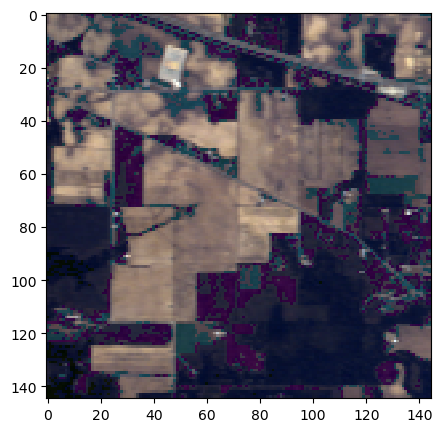

In [10]:
imshow(X, (30, 20, 10), figsize=(5, 5), interpolation='nearest')

#### 3. Load reference image (ground truth)

ImageView object:
  Interpolation       :  <default>

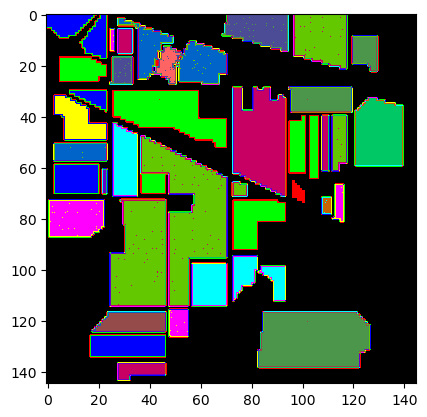

In [11]:
gt = scipy.io.loadmat('Indian_pines_gt.mat')['indian_pines_gt']
imshow(classes=gt)

In [12]:
# display class labels
classes, classes_count = np.unique(gt, return_counts='True')

In [13]:
classes_count

array([10776,    46,  1428,   830,   237,   483,   730,    28,   478,
          20,   972,  2455,   593,   205,  1265,   386,    93])

#### 4. Class distribution 

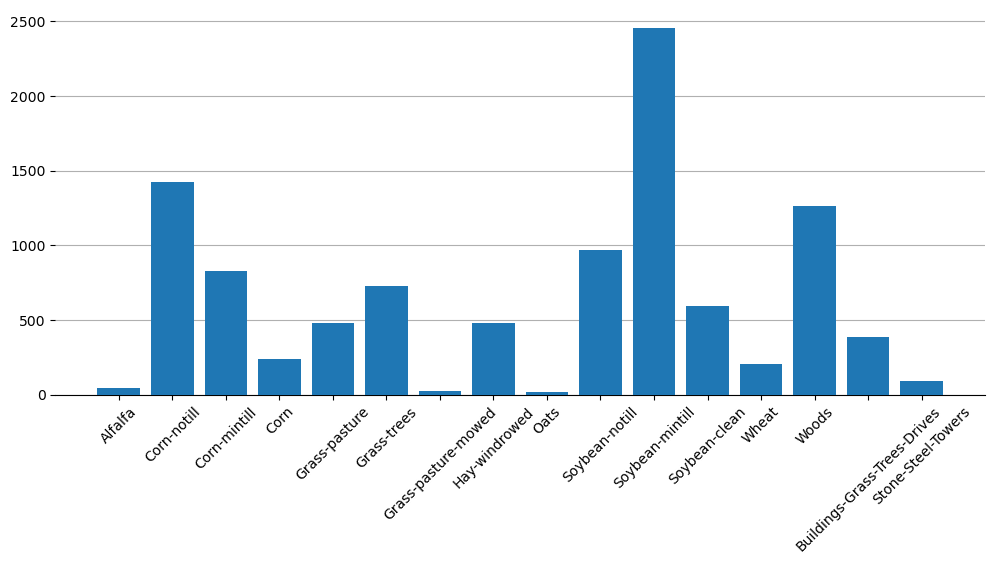

In [14]:
# Display class distribution using bar plot
plt.figure(figsize=(12, 5))

plt.bar(classes[1:], classes_count[1:], tick_label=class_names[1:], zorder=3)
plt.grid(axis='y', zorder=0)
_ = plt.xticks(rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### 5. Overlaying the ground truth mask on the image

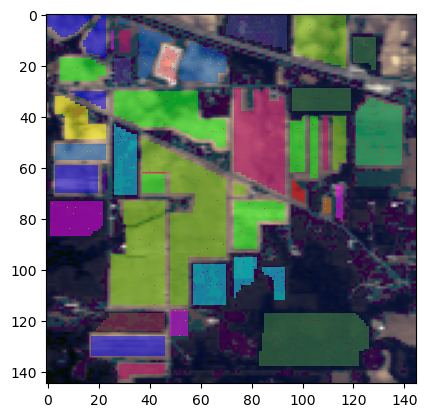

In [15]:
# your code
# use imshow. check options for overlay, or use your own solution
view = imshow(X, (30, 20, 10), classes=gt)
view.set_display_mode('overlay')
view.class_alpha = 0.5

#### 6.	Select 1% of samples from each class and plot their mean vectors. These mean vectors represent the mean spectral signatures of the classes.

In [16]:
# 1. Create a Python dcitionary for the class names 
# - key: class number
# - value: class name
class_names_a = np.array(class_names)
labels_dict = dict(zip(np.unique(gt), class_names))
unique, counts = np.unique(gt, return_counts=True)
labels_distribution = dict(zip(unique, counts))
labels_distribution

{0: 10776,
 1: 46,
 2: 1428,
 3: 830,
 4: 237,
 5: 483,
 6: 730,
 7: 28,
 8: 478,
 9: 20,
 10: 972,
 11: 2455,
 12: 593,
 13: 205,
 14: 1265,
 15: 386,
 16: 93}

In [17]:
# Remove the background class (# 0)
labels_distribution.pop(0)
labels_distribution

{1: 46,
 2: 1428,
 3: 830,
 4: 237,
 5: 483,
 6: 730,
 7: 28,
 8: 478,
 9: 20,
 10: 972,
 11: 2455,
 12: 593,
 13: 205,
 14: 1265,
 15: 386,
 16: 93}

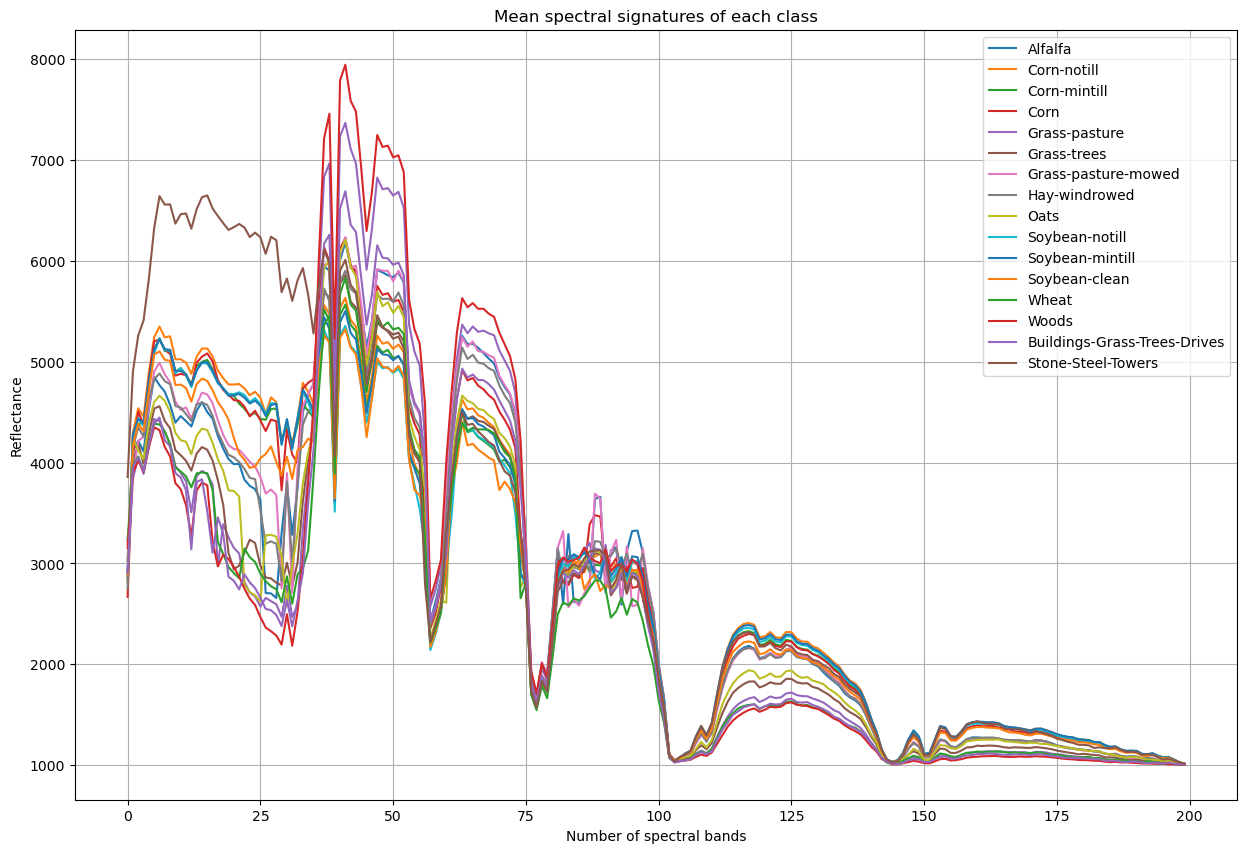

In [18]:
# complete your code here
plt.figure(figsize=(15, 10))
for class_label, class_name in labels_dict.items():
    if class_label == 0:
        continue
    class_indices = np.where(gt == class_label)
    num_samples = max(1, int(0.01 * len(class_indices[0])))
    np.random.seed(0)
    selected_indices = np.random.choice(range(len(class_indices[0])), num_samples, replace=False)
    class_samples = X[class_indices[0][selected_indices], class_indices[1][selected_indices], :]
    mean_vector = np.mean(class_samples, axis=0)
    plt.plot(mean_vector, label=class_name)
plt.legend()
plt.grid()
plt.title('Mean spectral signatures of each class')
plt.xlabel('Number of spectral bands')
plt.ylabel('Reflectance')
plt.show()

#### 7.1. Apply PCA on the data cube and display the data scatter using the first two components

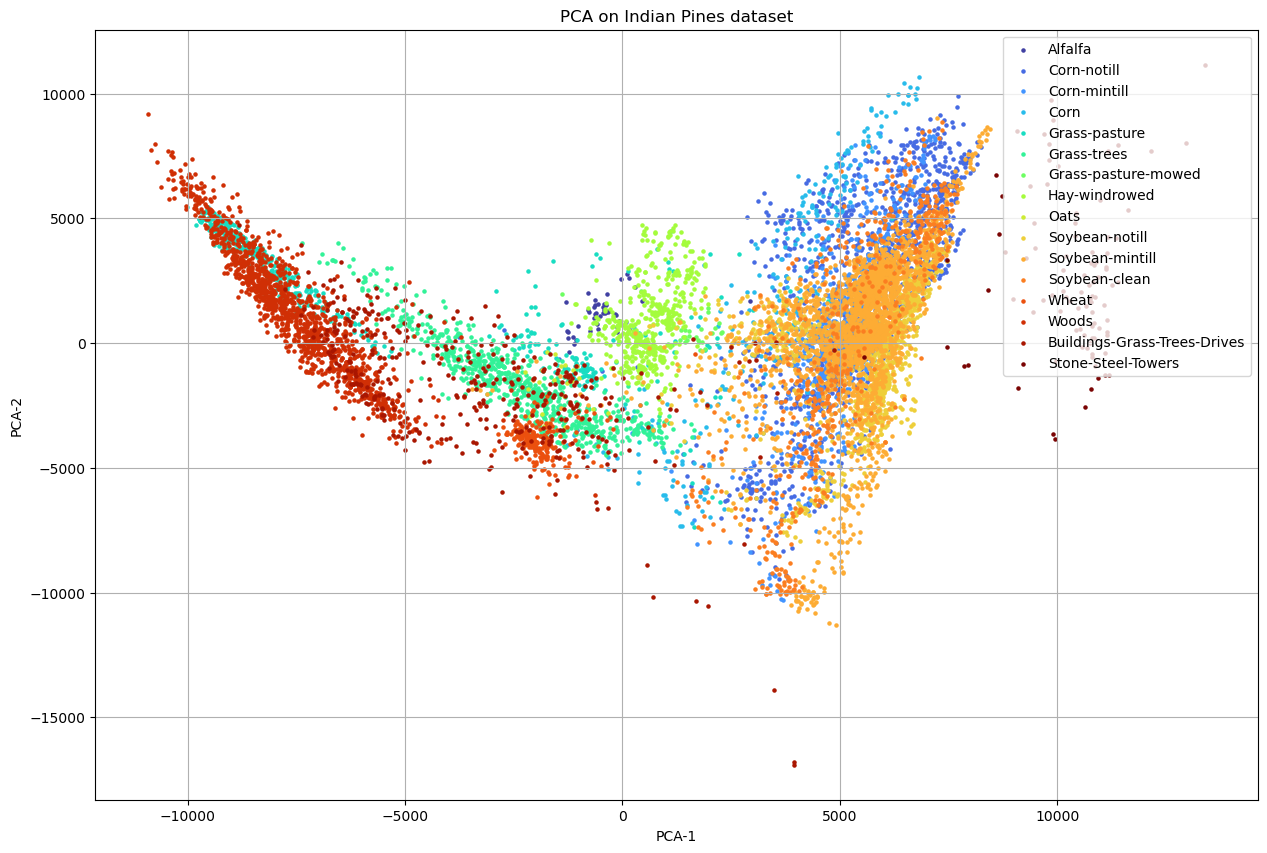

In [19]:
# your code here
X_reshaped = X.reshape(-1, X.shape[2])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reshaped)
y_reshaped = gt.reshape(-1)
colors = plt.cm.get_cmap('turbo', len(np.unique(y_reshaped)))
plt.figure(figsize=(15, 10))
for class_label, class_name in labels_dict.items():
    if class_label == 0:
        continue
    class_indices = np.where(y_reshaped == class_label)[0]
    plt.scatter(X_pca[class_indices, 0], X_pca[class_indices, 1], 
                color=colors(class_label), label=class_name, alpha=1, s=5)

plt.title('PCA on Indian Pines dataset')
plt.grid()
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.legend(loc='upper right')
plt.show()

#### 7.2. Apply t-SNE on the data cube and display the data scatter using the first two components

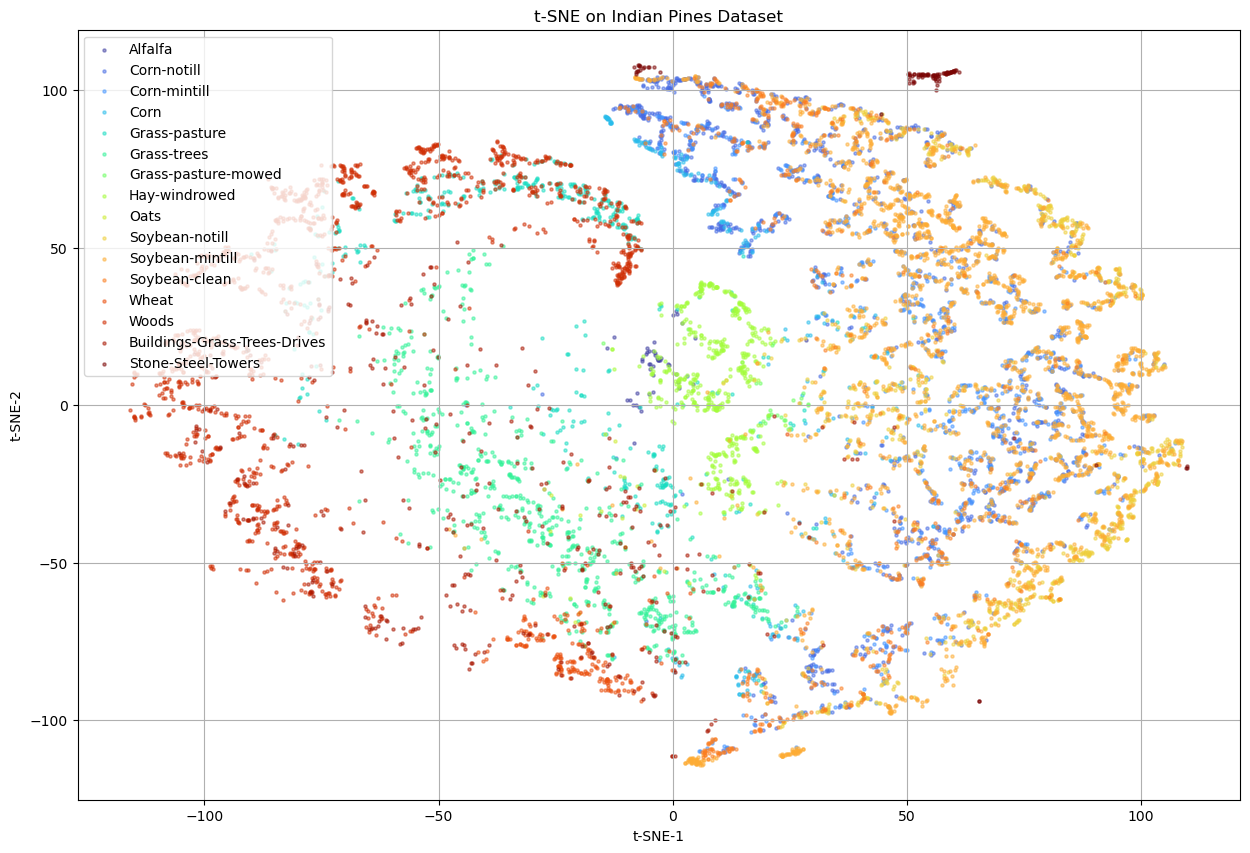

In [20]:
# your code here
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_pca)
num_classes = len(np.unique(y_reshaped))
plt.figure(figsize=(15, 10))
for class_label, class_name in labels_dict.items():
    if class_label == 0:
        continue
    class_indices = np.where(y_reshaped == class_label)[0]
    normalized_label = class_label / num_classes
    
    plt.scatter(X_tsne[class_indices, 0], X_tsne[class_indices, 1], alpha=0.5,
                color=colors(normalized_label), label=class_name, s=5)
plt.title('t-SNE on Indian Pines Dataset')
plt.grid()
plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.legend(loc='upper left') 
plt.show()


#### 8.1.	Reconstruct the image using the first important component of PCA.

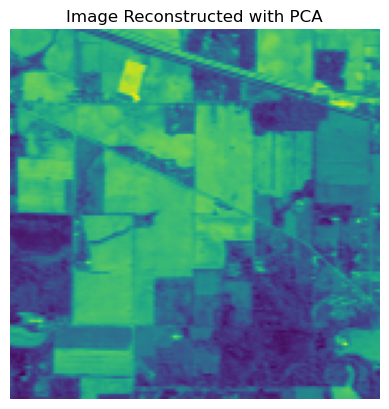

In [21]:
# Use PCA with a single component
pca_1 = PCA(n_components=1)
X_pca_1 = pca_1.fit_transform(X_reshaped)
reconstructed_image_pca = X_pca_1.reshape(X.shape[0], X.shape[1])
plt.imshow(reconstructed_image_pca)
plt.title('Image Reconstructed with PCA')
plt.axis('off')
plt.show()


#### 8.2. Reconstruct the image using the first important component of t-SNE.

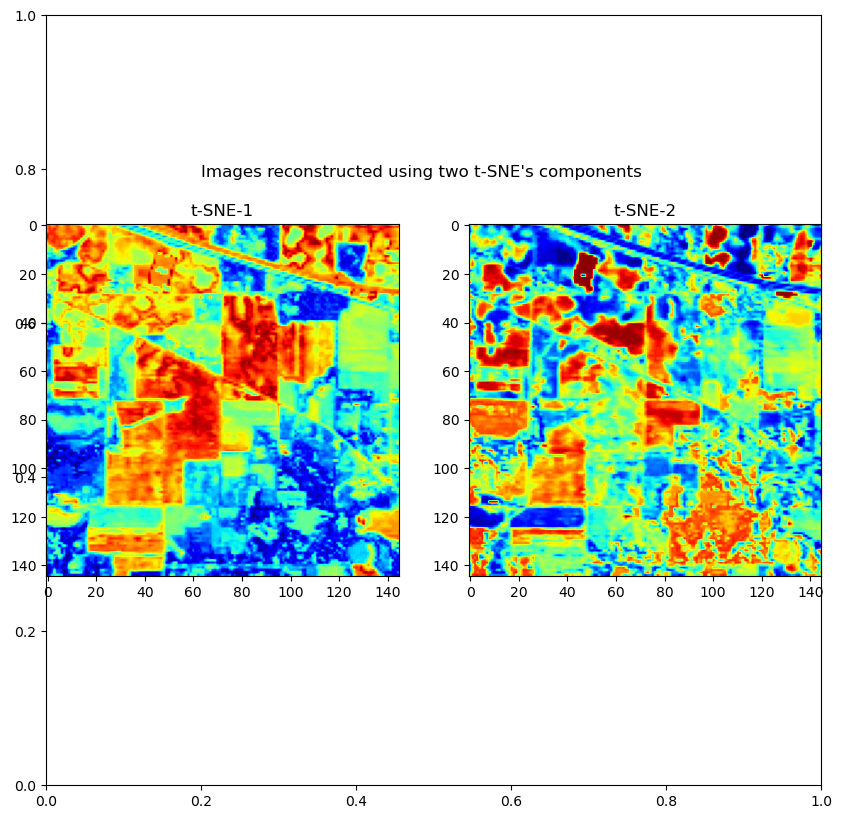

In [22]:
# your code
X_tsne_reshaped_1 = X_tsne[:, 0].reshape(X.shape[0], X.shape[1])
X_tsne_reshaped_2 = X_tsne[:, 1].reshape(X.shape[0], X.shape[1])
plt.subplots(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(X_tsne_reshaped_1, cmap='jet')
plt.title('t-SNE-1')   
plt.subplot(1, 2, 2)
plt.imshow(X_tsne_reshaped_2, cmap='jet')
plt.title('t-SNE-2')
plt.suptitle("Images reconstructed using two t-SNE's components", y=0.73)
plt.show()
